In [133]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%config InlineBackend.figure_format = 'retina'  # for better quality plots


$$ a*k = \frac{2}{T} \int*{0}^{T} f(x) \cos \left( \frac{2 \pi k x}{T} \right) dx $$
$$ b*k = \frac{2}{T} \int*{0}^{T} f(x) \sin \left( \frac{2 \pi k x}{T} \right) dx $$


$$
\int_a^b f(x)\, dx \approx \frac{b - a}{2N} \left[ f(x_0) + 2f(x_1) + 2f(x_2) + \cdots + 2f(x_{N - 1}) + f(x_N) \right]
$$

Hier ist `f(x)` die Funktion, die integriert werden soll, `a` und `b` sind die Integrationsgrenzen, `N` ist die Anzahl der Schritte (Trapeze) zur Diskretisierung des Integrals und `x_i` sind die diskreten Punkte, die die Kurve von `a` bis `b` repräsentieren.


In [134]:
def fourier_coefficient(x, y, k):
    T = x[-1] - x[0]
    omega = 2 * np.pi * k / T
    cos_term = np.trapz(y * np.cos(omega * x), x)
    sin_term = np.trapz(y * np.sin(omega * x), x)
    a_k = 2 * cos_term / T
    b_k = 2 * sin_term / T
    return a_k, b_k


$$ f(x) \approx \frac{a*0}{2} + \sum*{k=1}^{m} a_k \cos \left(\frac{2 \pi k x}{T}\right) + b_k \sin \left(\frac{2 \pi k x}{T}\right) $$


In [135]:
def fourier_approximation(x, y, m):
    a0 = np.trapz(y, x) / (x[-1] - x[0])
    approx = np.zeros_like(y) + a0 / 2
    for k in range(1, m + 1):
        a_k, b_k = fourier_coefficient(x, y, k)
        approx += a_k * np.cos(2 * np.pi * k * x / (x[-1] - x[0])) + b_k * np.sin(
            2 * np.pi * k * x / (x[-1] - x[0])
        )
    return approx

$$ f(x) = \frac{1}{e^x + e^{-x}} $$


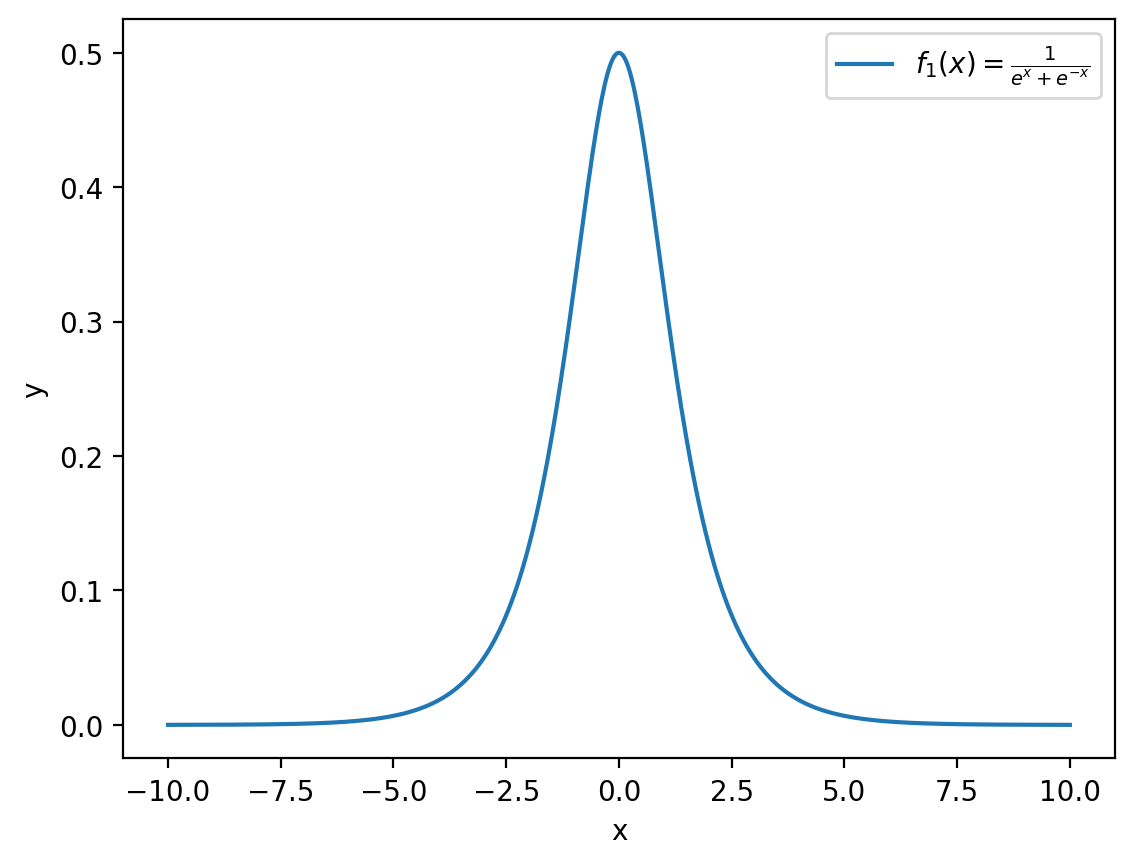

In [136]:
# (c) Nähern Sie die Funktion f1(x) = 1 / (e^x + e^(-x))
N = 600
x = np.linspace(-10, 10, N)
y = 1 / (np.exp(x) + np.exp(-x))

# Plotten des Vergleichs zur Originalfunktion
plt.plot(x, y, label="$f_1(x) = \\frac{1}{e^x + e^{-x}}$")

# label
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

plt.show()


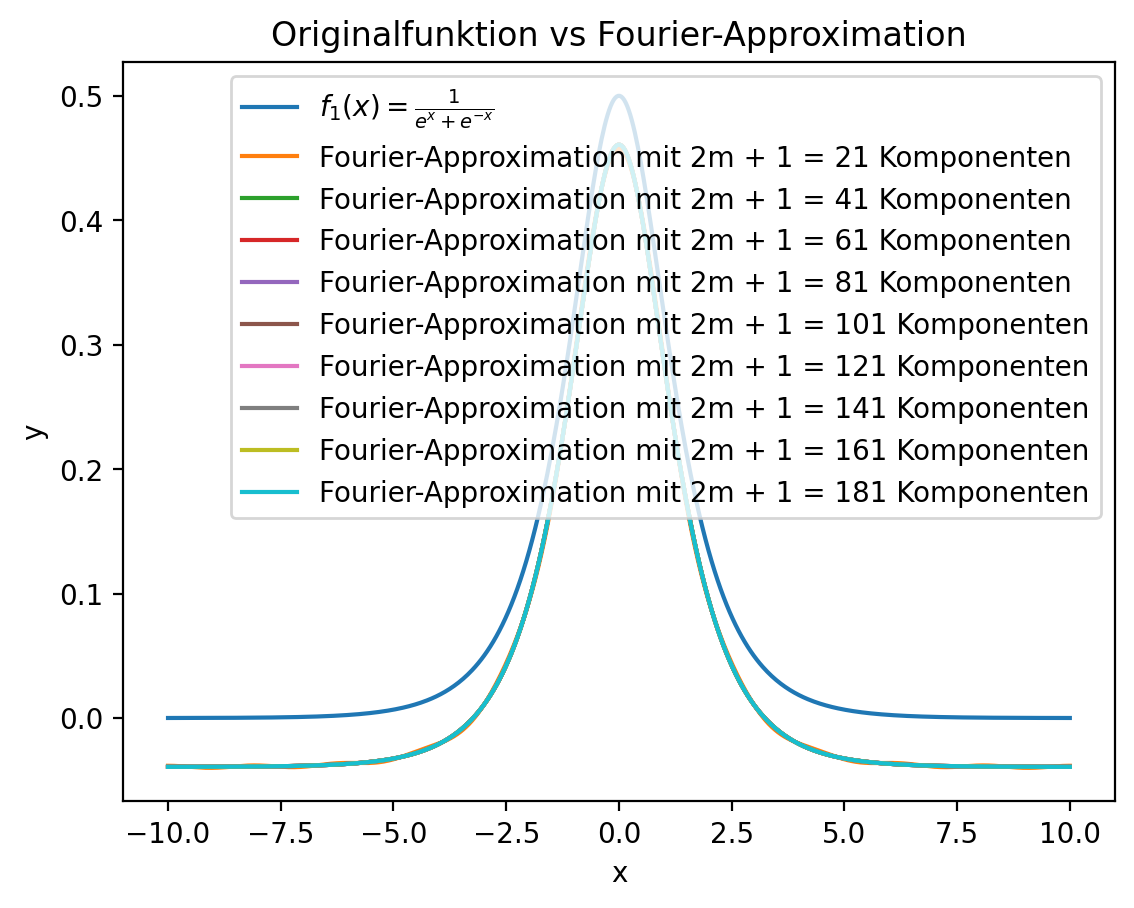

In [137]:
plt.plot(x, y, label="$f_1(x) = \\frac{1}{e^x + e^{-x}}$")

for m in range(10, 100, 10):
    y_approx = fourier_approximation(x, y, m)
    plt.plot(
        x, y_approx, label=f"Fourier-Approximation mit 2m + 1 = {2*m + 1} Komponenten"
    )

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Originalfunktion vs Fourier-Approximation")
plt.show()

In [138]:
from IPython.display import Audio

Audio("data/music.wav")


In [139]:
import librosa
from librosa import load, display

file_path = "data/music.wav"
samples, sampling_rate = librosa.load(
    file_path, sr=None, mono=True, offset=0.0, duration=None
)

len(samples), sampling_rate

(157173, 44100)

In [140]:
duration = len(samples) / sampling_rate
duration


3.564013605442177

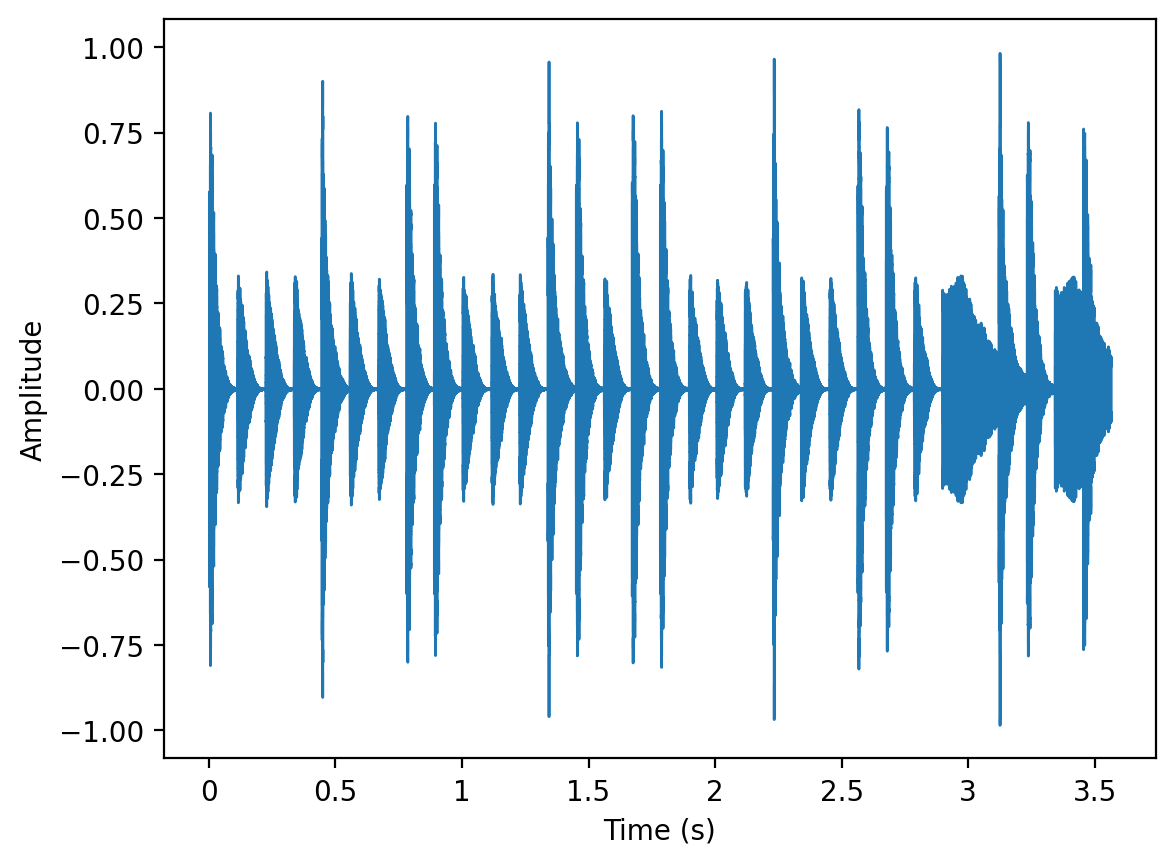

In [141]:
plt.figure()
librosa.display.waveshow(samples, sr=sampling_rate)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


In [142]:
# for fft on the audio
fft = np.fft.fft(samples)

# plot the frequency domain of the audio. Normalize if needed

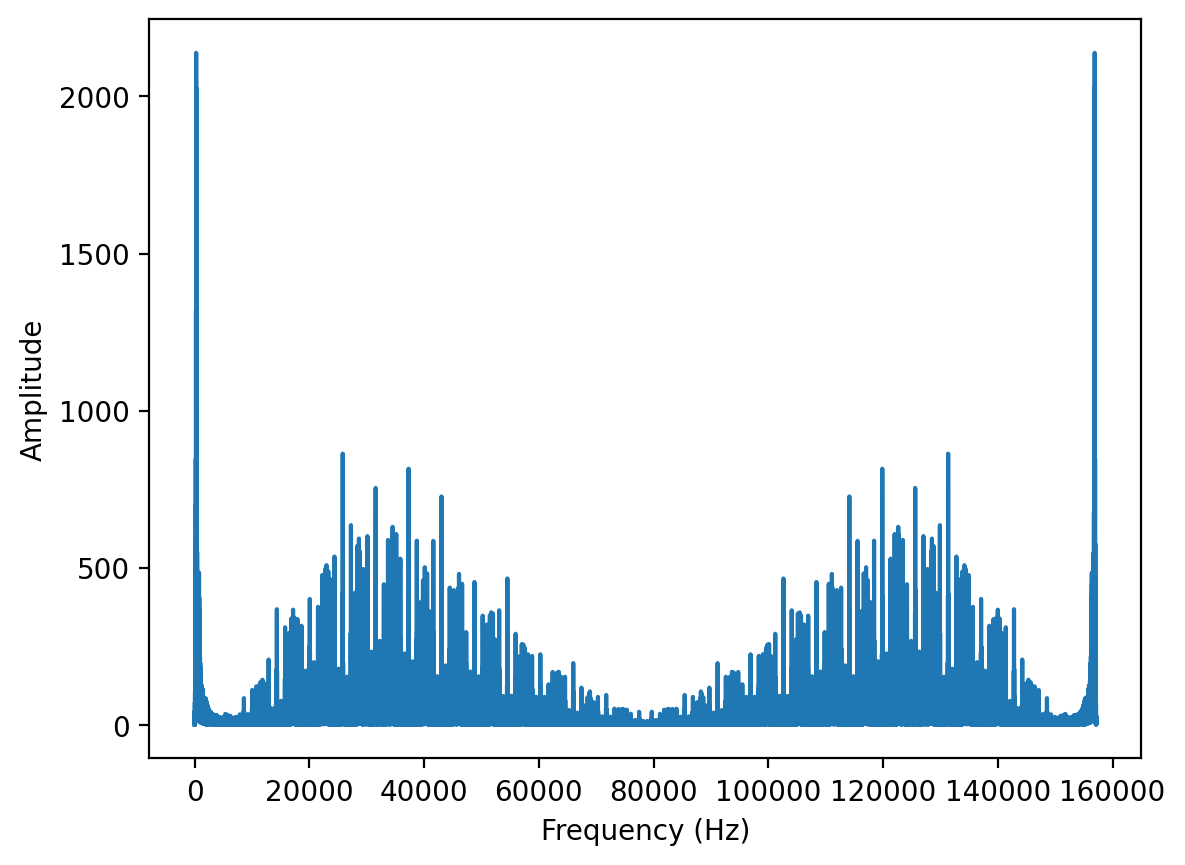

In [143]:
# Filter out frequencies above 2000 Hz
fft_filtered = fft.copy()
fft_filtered[np.abs(fft_filtered) > 10000] = 0

# plot the filtered frequency domain of the audio
plt.figure()
plt.plot(np.abs(fft_filtered))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.show()

/Users/noah/dev/vta_mc2/venv/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/noah/dev/vta_mc2/venv/lib/python3.11/site-packages/IPython/lib/display.py:172: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


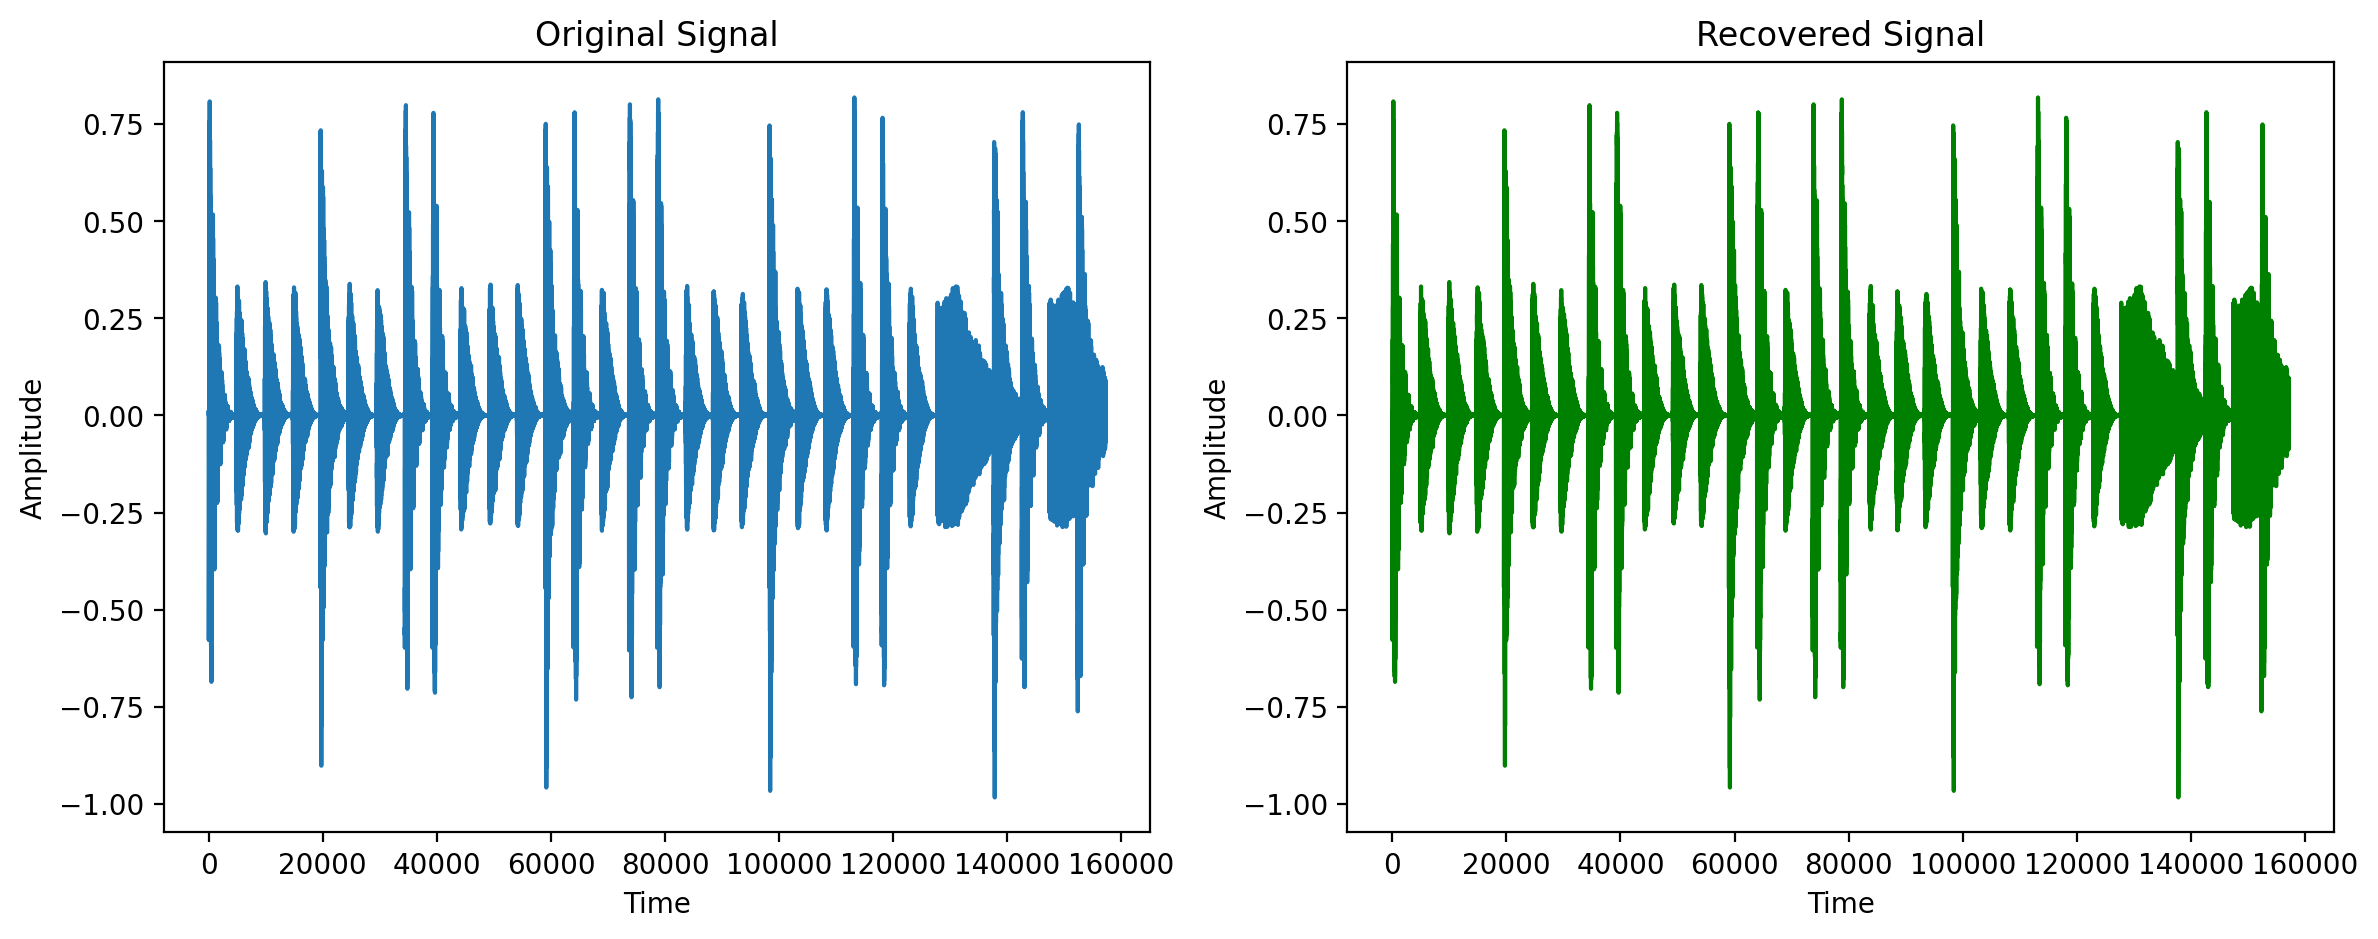

In [144]:
# Inverse FFT
recovered_signal = np.fft.ifft(fft_filtered)

# plot original signal and recovered signal in subplot
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.title("Original Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.plot(samples)

plt.subplot(1, 2, 2)
plt.title("Recovered Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.plot(recovered_signal, color="green")

# play recovered signal
Audio(recovered_signal, rate=sampling_rate)


In [145]:
# play original signal
Audio(samples, rate=sampling_rate)
